In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
data = pd.read_csv("netflix_titles_c.csv", header=None)
data.shape

(44312, 12)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,cast,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
1,Alan Marriott,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
2,Andrew Toth,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
3,Brian Dobson,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,Cole Howard,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...


In [ ]:
data[3]

0                                          title
1        Norm of the North: King Sized Adventure
2        Norm of the North: King Sized Adventure
3        Norm of the North: King Sized Adventure
4        Norm of the North: King Sized Adventure
                          ...                   
44307                                    Friends
44308                                    Friends
44309                                    Friends
44310                                    Friends
44311                                    Friends
Name: 3, Length: 44312, dtype: object

In [ ]:
# 1. Gather All Items of Each Transactions into Numpy Array
transaction = []
for i in range(2, data.shape[2]):
    for j in range(2, data.shape[3]):
        transaction.append(data.values[i,j])

transaction = np.array(transaction)

# 2. Transform Them a Pandas DataFrame
df = pd.DataFrame(transaction, columns=["items"])
df["incident_count"] = 1 # Put 1 to Each Item For Making Countable Table, to be able to perform Group By

# 3. Delete NaN Items from Dataset
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

# 5. Initial Visualizations
df_table.head(10).style.background_gradient(cmap='Blues')

IndexError: ignored

In [ ]:
df_table["all"] = "all" # to have a same origin

fig = px.treemap(df_table.head(30), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(30), hover_data=['items'],
                  color_continuous_scale='Blues',
                  )
fig.show()

In [ ]:
transaction = []
for i in range(data.shape[0]):
    transaction.append([str(data.values[i,j]) for j in range(data.shape[1])])

transaction = np.array(transaction)

# Create a DataFrame In Order To Check Status of Top20 Items

top20 = df_table["items"].head(20).values
array = []
df_top20_multiple_record_check = pd.DataFrame(columns=top20)

for i in range(0, len(top20)):
    array = []
    for j in range(0,transaction.shape[0]):
        array.append(np.count_nonzero(transaction[j]==top20[i]))
        if len(array) == len(data):
            df_top20_multiple_record_check[top20[i]] = array
        else:
            continue


df_top20_multiple_record_check.head(10)

,Movie,TV Show,United States,TV-MA,TV-14,1 Season,2018,2019,2017,India,2016,R,TV-PG,2015,PG-13,2 Seasons,"Dramas, International Movies",2014,Japan,2013
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_top20_multiple_record_check.describe()

,Movie,TV Show,United States,TV-MA,TV-14,1 Season,2018,2019,2017,India,2016,R,TV-PG,2015,PG-13,2 Seasons,"Dramas, International Movies",2014,Japan,2013
count,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000,44312.000000
mean,0.670744,0.329234,0.315287,0.312827,0.266068,0.201006,0.157971,0.139375,0.135223,0.130687,0.115341,0.108007,0.085823,0.080791,0.063730,0.056531,0.046082,0.044254,0.044209,0.040125
std,0.469948,0.469940,0.464635,0.463650,0.441905,0.400757,0.364718,0.346342,0.341965,0.337061,0.319437,0.310393,0.280106,0.272517,0.244274,0.230947,0.209666,0.205662,0.205562,0.196254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
transaction = []
for i in range(0, data.shape[0]):
    transaction.append(data.values[i,0])

transaction = np.array(transaction)

# 2. Transform Them a Pandas DataFrame
df_first = pd.DataFrame(transaction, columns=["items"])
df_first["incident_count"] = 1

# 3. Delete NaN Items from Dataset
indexNames = df_first[df_first['items'] == "nan" ].index
df_first.drop(indexNames , inplace=True)

# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations
df_table_first = df_first.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_first["movie"] = "movie"
df_table_first = df_table_first.truncate(before=-1, after=15)

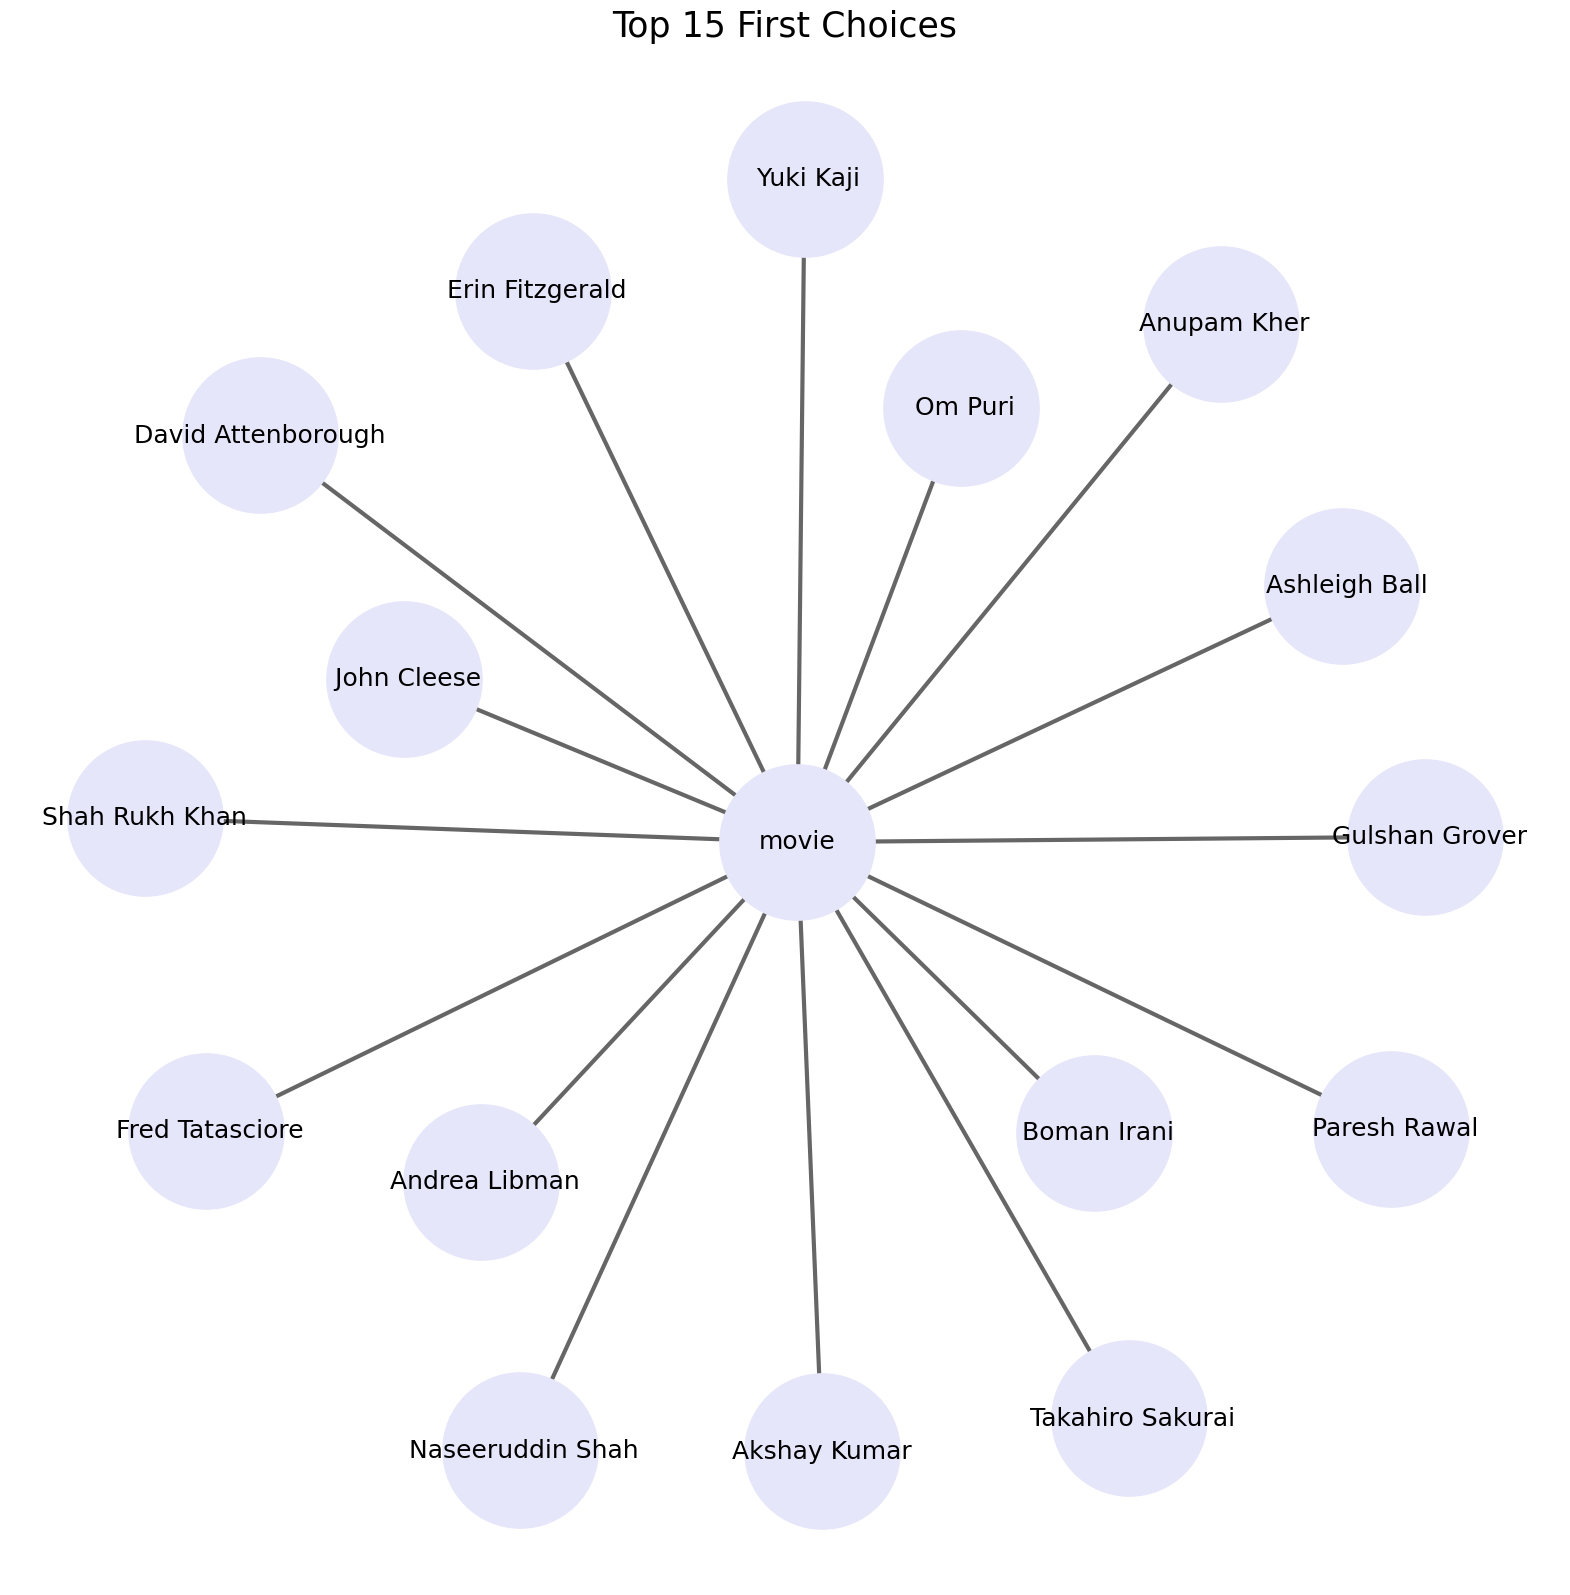

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
first_choice = nx.from_pandas_edgelist(df_table_first, source = 'movie', target = "items", edge_attr = True)
pos = nx.spring_layout(first_choice)
nx.draw_networkx_nodes(first_choice, pos, node_size = 12500, node_color = "lavender")
nx.draw_networkx_edges(first_choice, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(first_choice, pos, font_size = 18, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 25)
plt.show()

In [ ]:
transaction = []
for i in range(0, data.shape[0]):
    transaction.append(data.values[i,1])

transaction = np.array(transaction)

# 2. Transform Them a Pandas DataFrame
df_second = pd.DataFrame(transaction, columns=["items"])
df_second["incident_count"] = 1

# 3. Delete NaN Items from Dataset
indexNames = df_second[df_second['items'] == "nan" ].index
df_second.drop(indexNames , inplace=True)

# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations
df_table_second = df_second.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_second["movie"] = "movie"
df_table_second = df_table_second.truncate(before=-1, after=15)

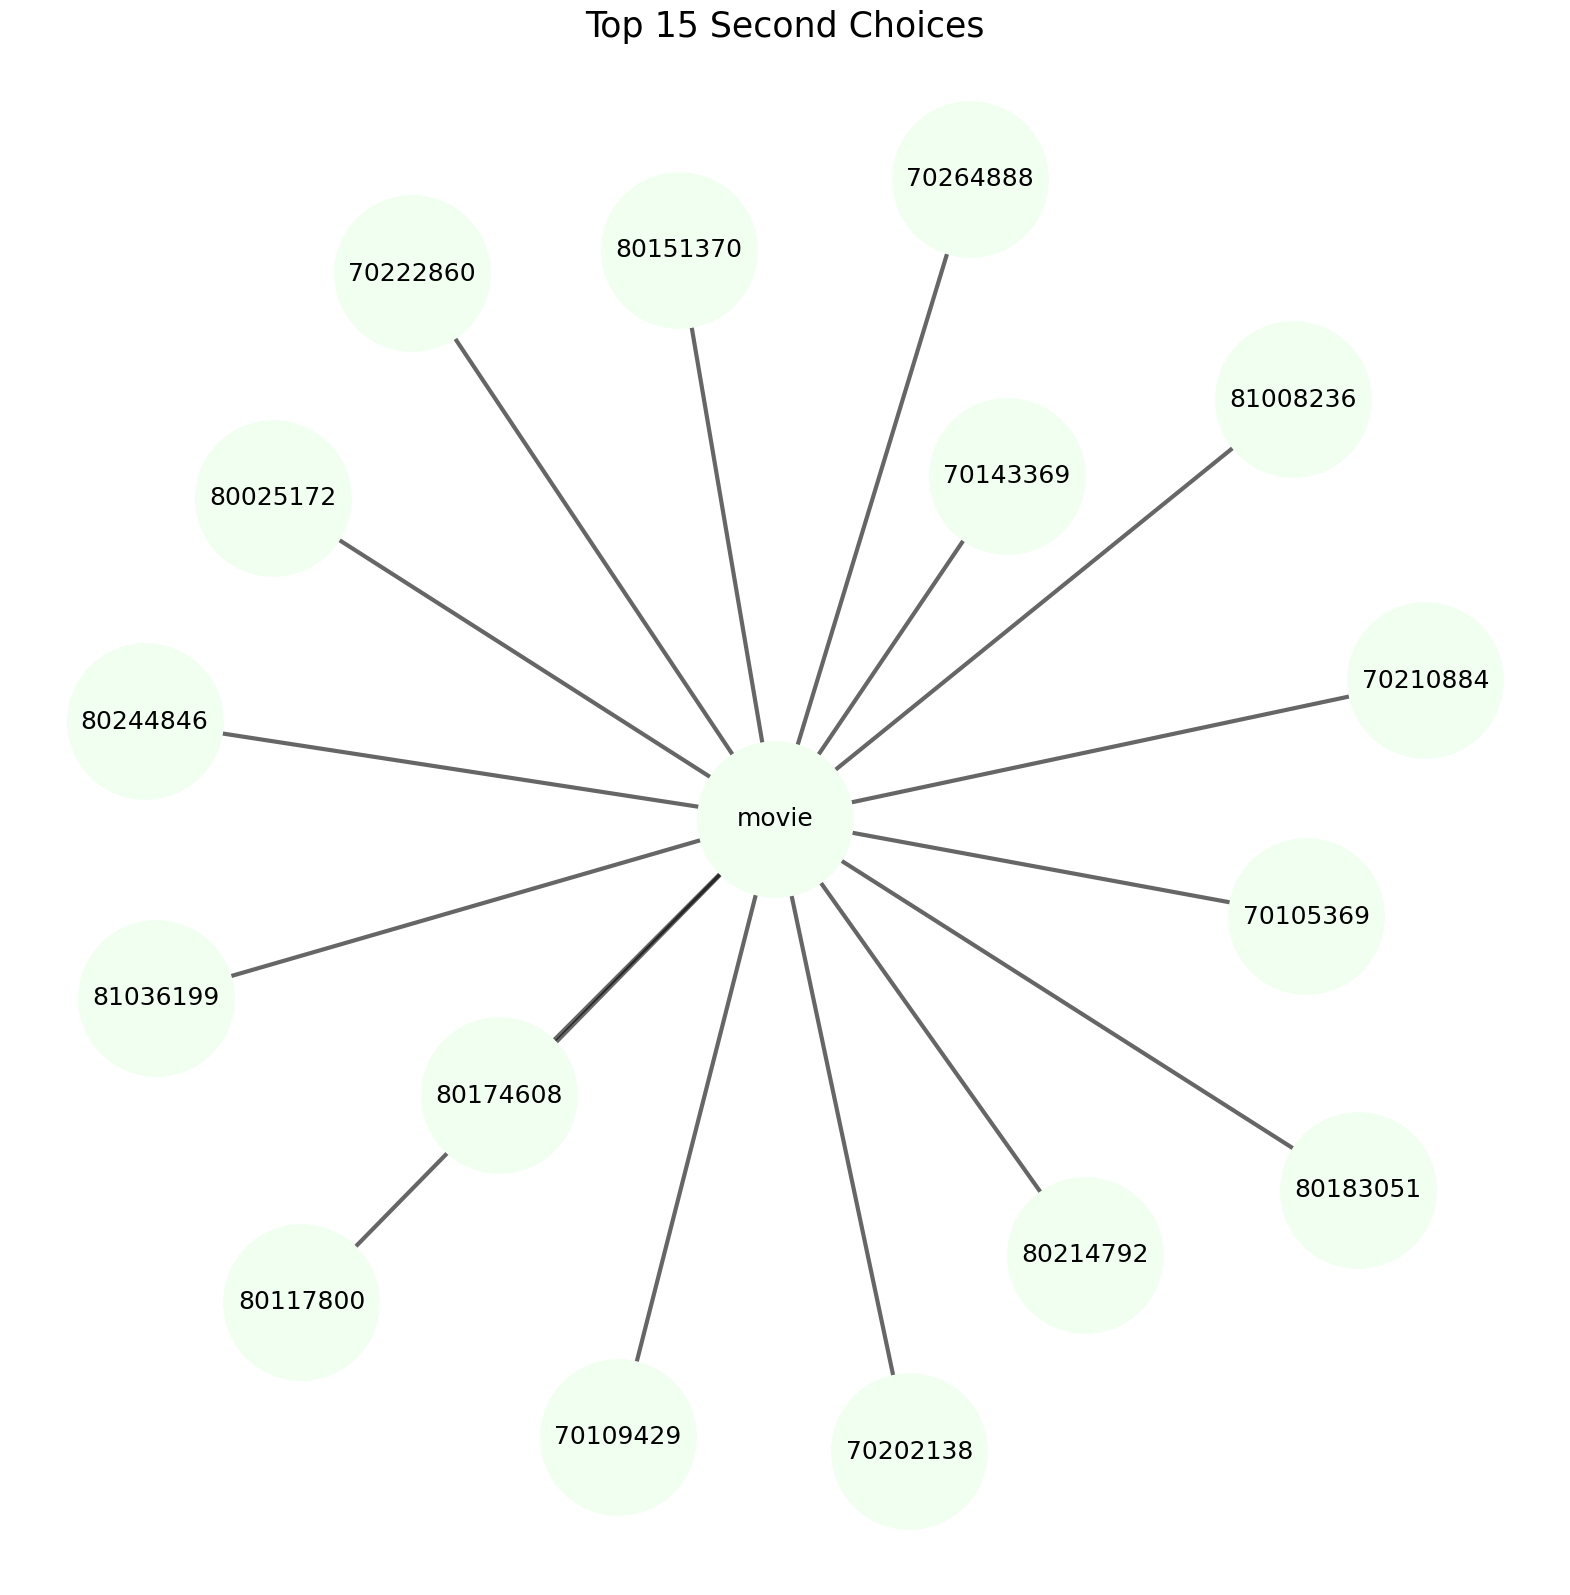

In [ ]:
import warnings
warnings.filterwarnings('ignore')

second_choice = nx.from_pandas_edgelist(df_table_second, source = 'movie', target = "items", edge_attr = True)
pos = nx.spring_layout(second_choice)
nx.draw_networkx_nodes(second_choice, pos, node_size = 12500, node_color = "honeydew")
nx.draw_networkx_edges(second_choice, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(second_choice, pos, font_size = 18, font_family = 'sans-serif')
plt.rcParams['figure.figsize'] = (20, 20)
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 25)
plt.show()

In [ ]:
transaction = []
for i in range(0, data.shape[0]):
    transaction.append(data.values[i,2])

transaction = np.array(transaction)

# 2. Transform Them a Pandas DataFrame
df_third = pd.DataFrame(transaction, columns=["items"]) # Transaction Item Name
df_third["incident_count"] = 1 # Put 1 to Each Item For Making Countable Table, Group By Will Be Done Later On

# 3. Delete NaN Items from Dataset
indexNames = df_third[df_third['items'] == "nan" ].index
df_third.drop(indexNames , inplace=True)

# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations
df_table_third = df_third.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_third["movie"] = "movie"
df_table_third = df_table_third.truncate(before=-1, after=15)

In [59]:
fig = go.Figure(data=[go.Bar(x=df_table_third["items"], y=df_table_third["incident_count"],
            hovertext=df_table_third["items"], text=df_table_third["incident_count"], textposition="outside")])

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.65)
fig.update_layout(title_text="Customers' First Choices", template="plotly_dark")
fig.show()

In [64]:
transaction = []
for i in range(data.shape[0]):
    transaction.append([str(data.values[i,j]) for j in range(data.shape[1])])

transaction = np.array(transaction)
transaction

array([['cast', 'show_id', 'type', ..., 'duration', 'listed_in',
        'description'],
       ['Alan Marriott', '81145628', 'Movie', ..., '90 min',
        'Children & Family Movies, Comedies',
        'Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.'],
       [' Andrew Toth', '81145628', 'Movie', ..., '90 min',
        'Children & Family Movies, Comedies',
        'Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.'],
       ...,
       [' Matt LeBlanc', '70153404', 'TV Show', ..., '10 Seasons',
        'Classic & Cult TV, TV Comedies',
        'This hit sitcom follows the merry misadventures of six 20-something pals as they navigate the pitfalls of work, life and love in 1990s Manhattan.'],
       [' Matthew Perry', '70153404', 'TV Show', ..., '10 Seasons',
        'Classic & Cult TV, TV Comedies',
   

In [66]:
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset

,Jr.,2 Chainz,50 Cent,A Boogie Wit tha Hoodie,A-ra Go,A. Murat Özgen,A.C. Peterson,A.D. Miles,A.J. Cook,A.J. LoCascio,...,แผนร้ายนายเจ้าเล่ห์,​Goli Soda 2,​Maj Rati ​​Keteki,​Mayurakshi,​SAINT SEIYA: Knights of the Zodiac,​​Kuch Bheege Alfaaz,海的儿子,마녀사냥,반드시 잡는다,최강전사 미니특공대 : 영웅의 탄생
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44309,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44310,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
first50 = df_table["items"].head(50).values # Select Top50
dataset = dataset.loc[:,first50] # Extract Top50
dataset

,Movie,TV Show,United States,TV-MA,TV-14,1 Season,2018,2019,2017,India,...,TV-Y7-FV,"Crime TV Shows, International TV Shows, TV Dramas","Action & Adventure, Dramas, International Movies","Dramas, International Movies, Romantic Movies","November 1, 2019","Anime Series, International TV Shows",Dramas,TV-Y,99 min,94 min
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44307,False,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44308,False,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44309,False,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44310,False,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
dataset.columns

Index(['Movie', 'TV Show', 'United States', 'TV-MA', 'TV-14', '1 Season',
       '2018', '2019', '2017', 'India', '2016', 'R', 'TV-PG', '2015', 'PG-13',
       '2 Seasons', 'Dramas, International Movies', '2014', 'Japan', '2013',
       'PG', 'United Kingdom', 'Comedies, Dramas, International Movies', 'NR',
       'Dramas, Independent Movies, International Movies', '2012', '3 Seasons',
       'TV-Y7', 'Children & Family Movies, Comedies', 'January 1, 2020',
       '2010', 'Kids' TV', '2009', '2011', 'Comedies, International Movies',
       'Children & Family Movies', 'Spain', '2008', 'South Korea', 'Canada',
       'TV-Y7-FV', 'Crime TV Shows, International TV Shows, TV Dramas',
       'Action & Adventure, Dramas, International Movies',
       'Dramas, International Movies, Romantic Movies', 'November 1, 2019',
       'Anime Series, International TV Shows', 'Dramas', 'TV-Y', '99 min',
       '94 min'],
      dtype='object')

In [70]:
def encode_units(x):
    if x == False:
        return 0
    if x == True:
        return 1

dataset = dataset.applymap(encode_units)
dataset.head(10)

,Movie,TV Show,United States,TV-MA,TV-14,1 Season,2018,2019,2017,India,...,TV-Y7-FV,"Crime TV Shows, International TV Shows, TV Dramas","Action & Adventure, Dramas, International Movies","Dramas, International Movies, Romantic Movies","November 1, 2019","Anime Series, International TV Shows",Dramas,TV-Y,99 min,94 min
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.670744,(Movie),1
1,0.329234,(TV Show),1
2,0.315287,(United States),1
3,0.312827,(TV-MA),1
4,0.266068,(TV-14),1
...,...,...,...
305,0.012322,"(TV-14, 2019, 1 Season, TV Show)",4
306,0.010832,"(TV-14, 1 Season, TV Show, 2016)",4
307,0.011351,"(TV-14, Japan, 1 Season, TV Show)",4
308,0.010358,"(TV-14, South Korea, 1 Season, TV Show)",4


In [72]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]

,support,itemsets,length
50,0.226936,"(Movie, United States)",2
51,0.184013,"(Movie, TV-MA)",2
52,0.151968,"(TV-14, Movie)",2
53,0.091172,"(2018, Movie)",2
54,0.055042,"(Movie, 2019)",2
55,0.090134,"(2017, Movie)",2
56,0.125519,"(Movie, India)",2
57,0.081129,"(Movie, 2016)",2
58,0.107465,"(R, Movie)",2
59,0.054996,"(Movie, TV-PG)",2


In [73]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) ].head()

,support,itemsets,length
192,0.045744,"(Movie, TV-MA, United States)",3
193,0.020514,"(TV-14, Movie, United States)",3
194,0.030421,"(2018, Movie, United States)",3
195,0.022793,"(Movie, 2019, United States)",3
196,0.031075,"(2017, Movie, United States)",3


In [74]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
768,"(Anime Series, International TV Shows)","(TV-14, Japan, TV Show)",0.018325,0.017896,0.010133,0.552956,30.898577,0.009805,2.196883,1,3
757,"(TV-14, Japan, TV Show)","(Anime Series, International TV Shows)",0.017896,0.018325,0.010133,0.566204,30.898577,0.009805,2.262990,3,1
761,"(TV-14, Anime Series, International TV Shows)","(Japan, TV Show)",0.011216,0.033332,0.010133,0.903421,27.103839,0.009759,10.009043,2,2
764,"(Japan, TV Show)","(TV-14, Anime Series, International TV Shows)",0.033332,0.011216,0.010133,0.303995,27.103839,0.009759,1.420656,2,2
508,"(Anime Series, International TV Shows)","(Japan, TV Show)",0.018325,0.033332,0.015639,0.853448,25.604604,0.015028,6.596089,1,2
...,...,...,...,...,...,...,...,...,...,...,...
315,"(TV Show, United States)",(TV-MA),0.088351,0.312827,0.034235,0.387484,1.238652,0.006596,1.121885,2,1
307,(2015),"(R, Movie)",0.080791,0.107465,0.010719,0.132682,1.234646,0.002037,1.029074,1,2
302,"(R, Movie)",(2015),0.107465,0.080791,0.010719,0.099748,1.234646,0.002037,1.021058,2,1
590,"(2018, Movie, United States)",(TV-MA),0.030421,0.312827,0.011487,0.377596,1.207045,0.001970,1.104063,3,1


In [75]:
rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
492,"(2 Seasons, 2018)",(TV Show),0.012908,0.329234,0.012908,1.000000,3.037357,0.008659,inf,2,1
642,"(1 Season, 2019, United States)",(TV Show),0.012683,0.329234,0.012683,1.000000,3.037357,0.008507,inf,3,1
231,"(Dramas, Independent Movies, International Mov...",(Movie),0.013811,0.670744,0.013811,1.000000,1.490882,0.004547,inf,2,1
440,"(1 Season, 2019)",(TV Show),0.048046,0.329234,0.048046,1.000000,3.037357,0.032227,inf,2,1
237,"(Comedies, International Movies, TV-MA)",(Movie),0.010607,0.670744,0.010607,1.000000,1.490882,0.003492,inf,2,1
...,...,...,...,...,...,...,...,...,...,...,...
306,(Movie),"(R, 2015)",0.670744,0.010923,0.010719,0.015981,1.463159,0.003393,1.005141,1,2
201,(Movie),"(November 1, 2019, United States)",0.670744,0.010719,0.010697,0.015948,1.487743,0.003507,1.005313,1,2
617,(Movie),"(TV-14, India, Dramas, International Movies)",0.670744,0.010674,0.010674,0.015914,1.490882,0.003515,1.005325,1,3
240,(Movie),"(Comedies, International Movies, TV-MA)",0.670744,0.010607,0.010607,0.015813,1.490882,0.003492,1.005290,1,2


In [79]:
rules[~rules["consequents"].str.contains("Movie", regex=False) &
      ~rules["antecedents"].str.contains("Movie", regex=False)].sort_values("confidence", ascending=False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
390,"(TV-14, 1 Season)",(TV Show),0.075352,0.329234,0.075352,1.0,3.037357,0.050544,inf,2,1
690,"(TV-MA, Crime TV Shows, International TV Shows...",(TV Show),0.012908,0.329234,0.012908,1.0,3.037357,0.008659,inf,3,1
480,"(Crime TV Shows, International TV Shows, TV Dr...",(TV Show),0.016542,0.329234,0.016542,1.0,3.037357,0.011096,inf,2,1


In [80]:
rules[rules["antecedents"].str.contains("Movie", regex=False) & rules["antecedents_length"] == 1].sort_values("confidence", ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
607,"(TV-14, Movie, Dramas, International Movies)",(India),0.016677,0.130687,0.010674,0.640054,4.897613,0.008495,2.415122,3,1
609,"(Movie, India, Dramas, International Movies)",(TV-14),0.017941,0.266068,0.010674,0.594969,2.236153,0.005901,1.812037,3,1
598,"(2017, Movie, United States)",(TV-MA),0.031075,0.312827,0.014624,0.470588,1.504307,0.004902,1.297993,3,1
590,"(2018, Movie, United States)",(TV-MA),0.030421,0.312827,0.011487,0.377596,1.207045,0.001970,1.104063,3,1
599,"(Movie, TV-MA, United States)",(2017),0.045744,0.135223,0.014624,0.319684,2.364127,0.008438,1.271141,3,1
